In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import cm
import copy
import pandas as pd
import matplotlib.colors as mcol
from matplotlib import cm
import numpy.matlib
import cmocean as cmo
from matplotlib.colors import ListedColormap

In [2]:
%matplotlib nbagg

### recreate Figure 5 in Rackow et al. (2021), Nature Communications

In [3]:
import pickle

In [4]:
with open('../data/data_Fig5bcef.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not have to specify it.
    data = pickle.load(f)
f.close()

### plotting LR and HR change in panel c)

In [5]:
nlats=180
lats=np.linspace(-89.95,89.95,nlats)
depth=np.array([  -0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.,  115.,  135.,  160.,  190.,  230.,  280.,  340.,
        410.,  490.,  580.,  680.,  790.,  910., 1040., 1180., 1330.,
       1500., 1700., 1920., 2150., 2400., 2650., 2900., 3150., 3400.,
       3650., 3900., 4150., 4400., 4650., 4900., 5150., 5400., 5650.,
       5900.])

In [6]:
# create LATS and DEPTHs
LATS,DEPTH=np.meshgrid(lats,-depth)

<IPython.core.display.Javascript object>


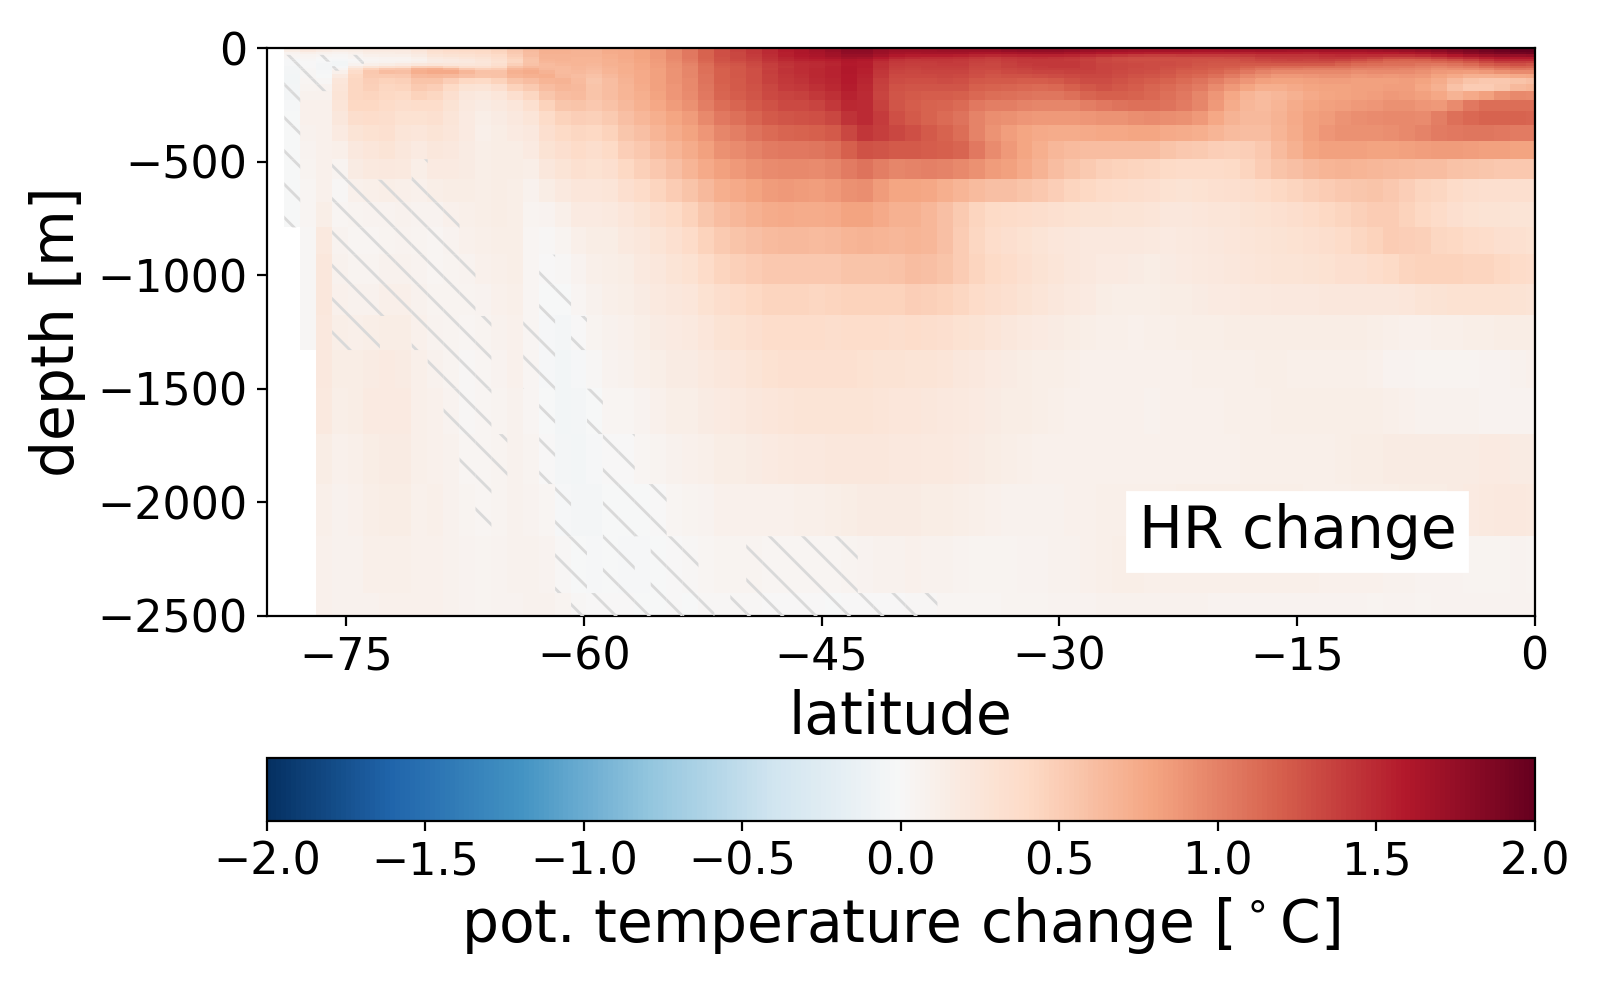

In [8]:
fig1, ax1 = plt.subplots(figsize=(8,5))
fontsize=21
numfontsize=16

# set nan to white
cmap=copy.copy(plt.cm.RdBu_r)
cmap.set_bad('white',1.)

# plot colors
HRchange=data['HRchange'] # delta approach: zonalmean_HRscen_end-zonalmean_HRscen_start-HRdrift
im=ax1.pcolormesh(LATS,DEPTH,HRchange,vmin=-2.,vmax=2.,cmap=cmap, shading='auto')

#darker hatching
#significance_hatching=np.abs(HRchange)>2*zonalmean30yr_HRSTD
#zm = np.ma.masked_less(~significance_hatching, 1.)
#im2=ax1.pcolor(LATS,DEPTH,zm, hatch='\\\\', alpha=0.)

# plot lighter hatching over it (https://stackoverflow.com/questions/64986547/multiple-hatched-areas-with-different-hatch-color-using-pcolor-in-matplotlib)
significance_hatching=np.abs(HRchange)>2*data['zonalmean30yr_HRSTD']
zm = np.ma.masked_less(~significance_hatching, 1.)
none_map = ListedColormap(['none']) # get rid of the weird face color bug
im2=ax1.pcolor(LATS,DEPTH,zm, cmap=none_map, 
               hatch='\\\\', edgecolor='0.85', lw=0, zorder=6)

plt.xlabel('latitude', fontsize=fontsize)
plt.ylabel('depth [m]', fontsize=fontsize)

ax1.set_xlim([-80,0])
ax1.set_ylim([-2500,0])
plt.xticks([-75,-60,-45,-30,-15,0])
# tick sizes
plt.xticks(fontsize=numfontsize, rotation=0)
plt.yticks(fontsize=numfontsize, rotation=0)

cb=plt.colorbar(im, orientation='horizontal',pad=.17)
cb.set_label('pot. temperature change [$^\circ$C]', fontsize=fontsize)
cb.ax.tick_params(labelsize=numfontsize) 

ax1.text(-25.,-2200.,'HR change', fontsize=fontsize, backgroundcolor = 'w', color = 'k')

plt.tight_layout()

saveFIG=True
if saveFIG==True:
   pp = PdfPages('./Figure5c_HR.pdf')
   pp.savefig(fig1,bbox_inches = 'tight')
   pp.close()

<IPython.core.display.Javascript object>


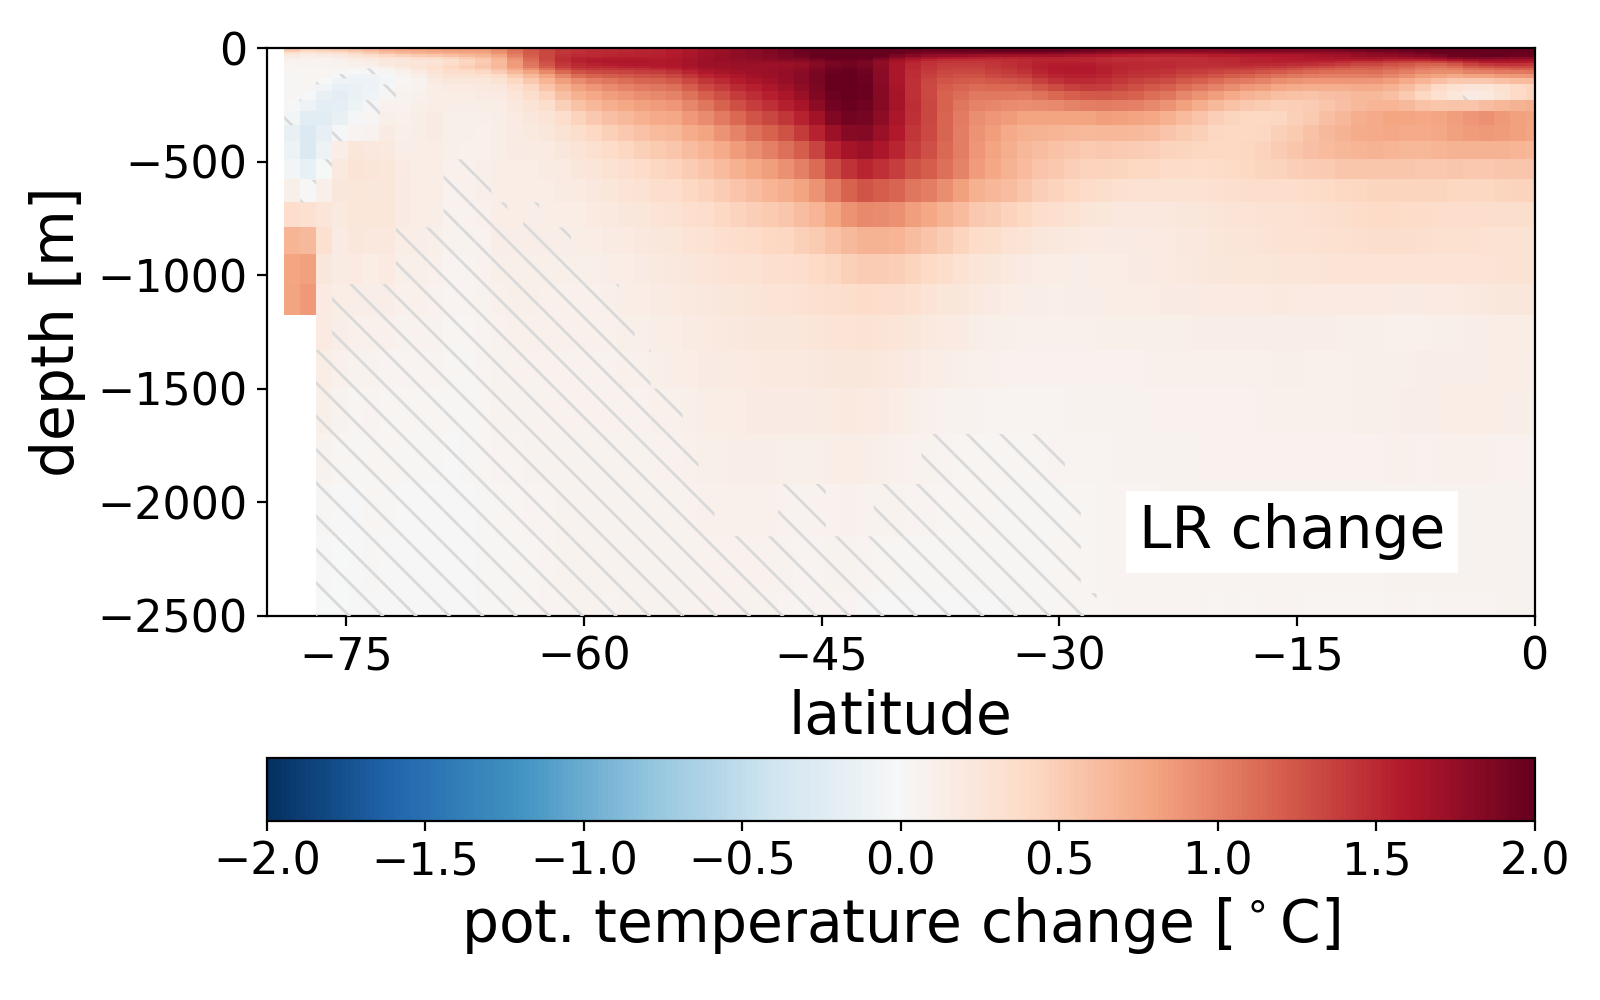

In [9]:
fig1, ax1 = plt.subplots(figsize=(8,5))
fontsize=21
numfontsize=16

# set nan to white
cmap=copy.copy(plt.cm.RdBu_r)
cmap.set_bad('white',1.)

# plot colors
LRchange=data['LRchange'] # delta approach: zonalmean_LRscen_end-zonalmean_LRscen_start-LRdrift
im=ax1.pcolormesh(LATS,DEPTH,LRchange,vmin=-2.,vmax=2.,cmap=cmap, shading='auto')

#darker hatching
#significance_hatching=np.abs(HRchange)>2*zonalmean30yr_HRSTD
#zm = np.ma.masked_less(~significance_hatching, 1.)
#im2=ax1.pcolor(LATS,DEPTH,zm, hatch='\\\\', alpha=0.)

# plot lighter hatching over it (https://stackoverflow.com/questions/64986547/multiple-hatched-areas-with-different-hatch-color-using-pcolor-in-matplotlib)
significance_hatching=np.abs(LRchange)>2*data['zonalmean30yr_STD']
zm = np.ma.masked_less(~significance_hatching, 1.)
none_map = ListedColormap(['none']) # get rid of the weird face color bug
im2=ax1.pcolor(LATS,DEPTH,zm, cmap=none_map, 
               hatch='\\\\', edgecolor='0.85', lw=0, zorder=6)

plt.xlabel('latitude', fontsize=fontsize)
plt.ylabel('depth [m]', fontsize=fontsize)

ax1.set_xlim([-80,0])
ax1.set_ylim([-2500,0])
plt.xticks([-75,-60,-45,-30,-15,0])
# tick sizes
plt.xticks(fontsize=numfontsize, rotation=0)
plt.yticks(fontsize=numfontsize, rotation=0)

cb=plt.colorbar(im, orientation='horizontal',pad=.17)
cb.set_label('pot. temperature change [$^\circ$C]', fontsize=fontsize)
cb.ax.tick_params(labelsize=numfontsize) 

ax1.text(-25.,-2200.,'LR change', fontsize=fontsize, backgroundcolor = 'w', color = 'k')

plt.tight_layout()

saveFIG=True
if saveFIG==True:
   pp = PdfPages('./Figure5c_LR.pdf')
   pp.savefig(fig1,bbox_inches = 'tight')
   pp.close()

### Add ice edge changes for panel b)

In [10]:
with open('../data/data_Fig4_ice.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not have to specify it.
    dataSIE = pickle.load(f)
f.close()

<IPython.core.display.Javascript object>


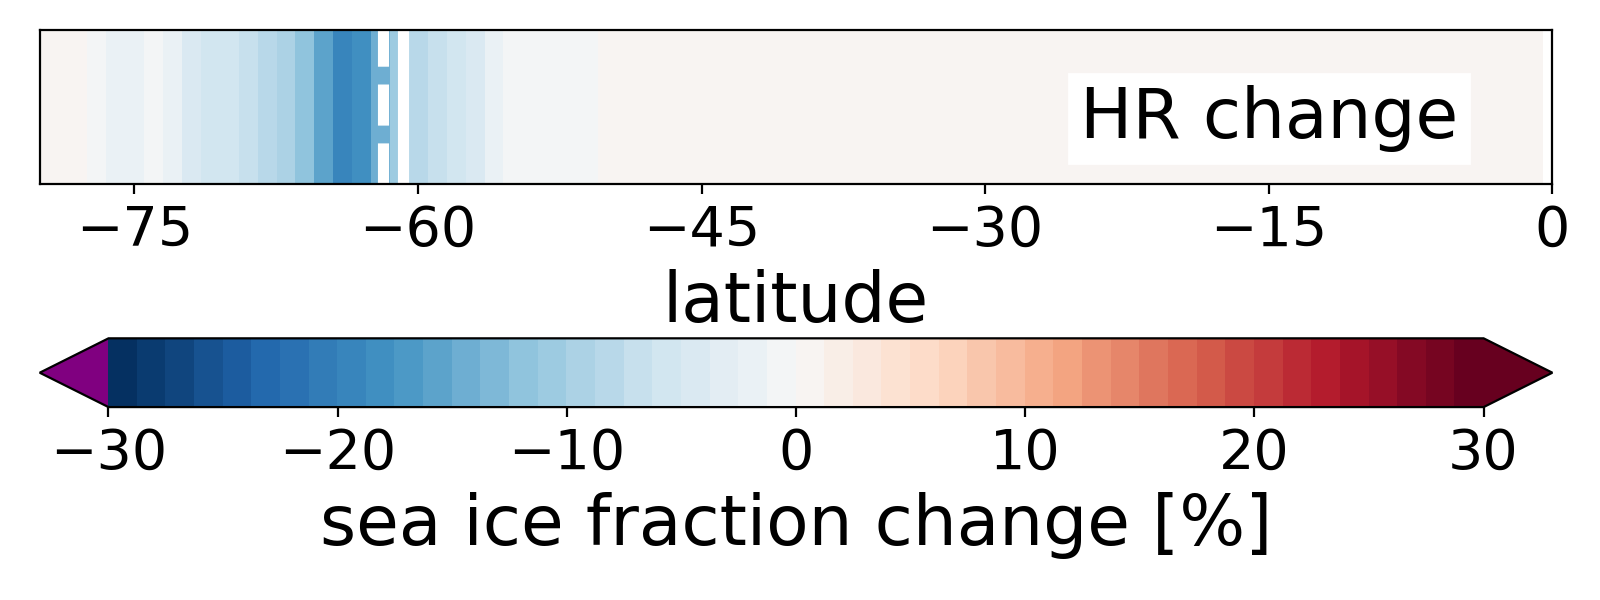

In [12]:
fig1, ax1 = plt.subplots(figsize=(8,3))
texfontsize=25
numfontsize=20

lvIce = np.linspace(0.,1.0,48) #12
cmIce = cm.RdBu_r(lvIce)
newCmap = mcol.ListedColormap(cmIce)
newCmap.set_bad('white',1.)
newCmap.set_under('purple')

cmap=cm.RdBu_r #dense_r #ice

which='HR'
period='sta'

yySIE=dataSIE[which]['yy'];
xxSIE=dataSIE[which]['xx'];

#plt.gca().invert_xaxis()

lats=yySIE[:,0];
lats[lats>0.]=np.nan; # just keep Southern Ocean
lons=xxSIE[0,:];

# data
HRchangeSIE=100.*( np.mean( dataSIE[which]['area_end'][:,:], axis=1) - np.mean( dataSIE[which]['area_sta'][:,:], axis=1) )
HRchaCTRSIE=100.*( np.mean( dataSIE[which+'ctrl']['area_end'][:,:], axis=1) - np.mean( dataSIE[which+'ctrl']['area_sta'][:,:], axis=1) )

X=lats; Z=HRchangeSIE-HRchaCTRSIE # delta approach

Y=np.arange(0,5)
Yrep=np.matlib.repmat(Y, 180, 1).T

im=plt.pcolor(np.array([X,X,X,X,X]),Yrep, np.array([Z,Z,Z,Z,Z]), cmap=newCmap, vmin=-20., vmax=20.)

plt.vlines(np.mean(dataSIE[which]['extents_sta'][:]), 0., 4., color='w', linewidths=4, linestyle='solid')
plt.vlines(np.mean(dataSIE[which]['extents_end'][:]), 0., 4., color='w', linewidths=4, linestyle='dashed')
plt.axis([-78., 0., 0., 4.]);

plt.xlabel('latitude', fontsize=texfontsize)

ax1.set_xlim([-80.,0.])
ax1.set_ylim([0,1.])
plt.xticks([-75,-60,-45,-30,-15,0])
# tick sizes
plt.xticks(fontsize=numfontsize, rotation=0)
plt.yticks(fontsize=numfontsize, rotation=0)

# Now adding the colorbar
cb=plt.colorbar(im, orientation='horizontal',pad=.3, fraction=0.4, extend='both')
cb.set_label('sea ice fraction change [%]', fontsize=texfontsize)
cb.ax.tick_params(labelsize=numfontsize) 
plt.clim(-30.,30.)

ax1.axes.yaxis.set_visible(False)

ax1.text(-25.,0.3,which+' change', fontsize=texfontsize, backgroundcolor = 'w', color = 'k')

plt.tight_layout()

saveFIG=True
if saveFIG==True:
   pp = PdfPages('./Figure5b_HR.pdf')
   pp.savefig(fig1,bbox_inches = 'tight')
   pp.close()

<IPython.core.display.Javascript object>


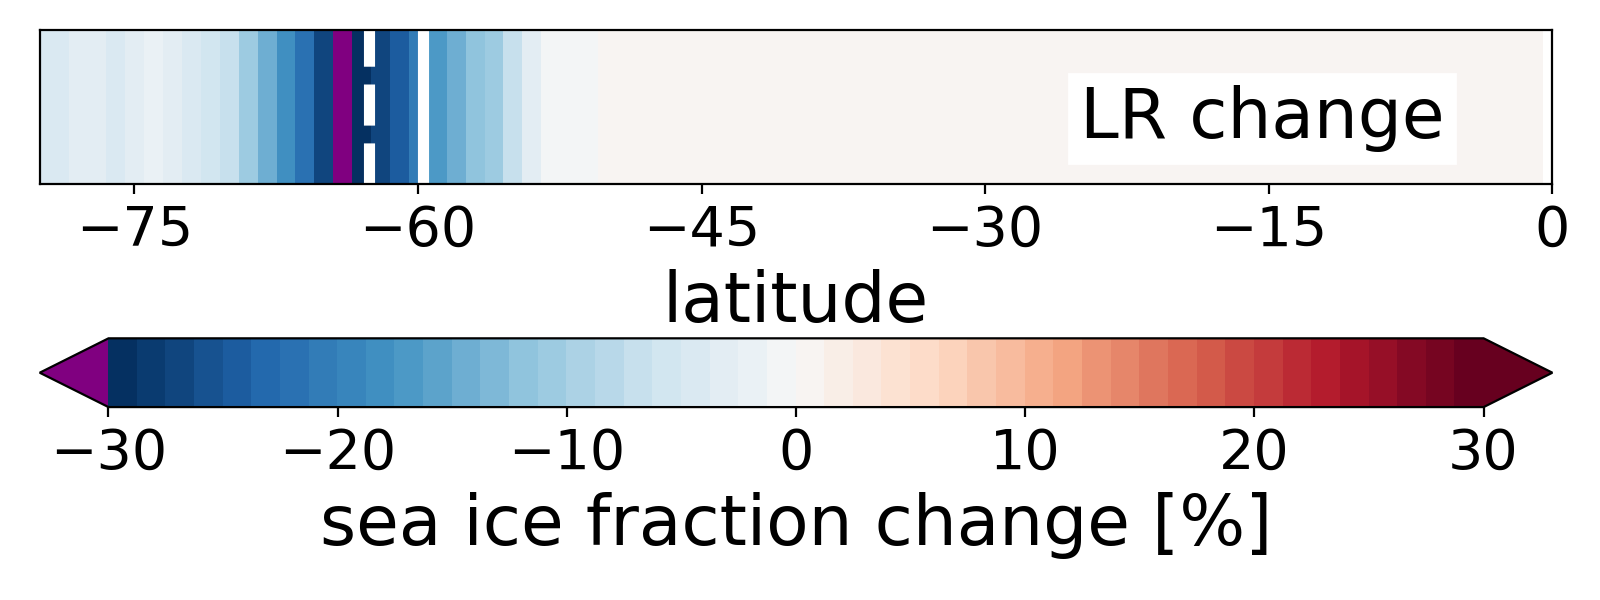

In [13]:
fig1, ax1 = plt.subplots(figsize=(8,3))
texfontsize=25
numfontsize=20

lvIce = np.linspace(0.,1.0,48) #12
cmIce = cm.RdBu_r(lvIce)
newCmap = mcol.ListedColormap(cmIce)
newCmap.set_bad('white',1.)
newCmap.set_under('purple')

cmap=cm.RdBu_r #dense_r #ice

which='LR'
period='sta'

yySIE=dataSIE[which]['yy'];
xxSIE=dataSIE[which]['xx'];

#plt.gca().invert_xaxis()

lats=yySIE[:,0];
lats[lats>0.]=np.nan; # just keep Southern Ocean
lons=xxSIE[0,:];

# data
LRchangeSIE=100.*( np.mean( dataSIE[which]['area_end'][:,:], axis=1) - np.mean( dataSIE[which]['area_sta'][:,:], axis=1) )
LRchaCTRSIE=100.*( np.mean( dataSIE[which+'ctrl']['area_end'][:,:], axis=1) - np.mean( dataSIE[which+'ctrl']['area_sta'][:,:], axis=1) )

X=lats; Z=LRchangeSIE-LRchaCTRSIE # delta approach

Y=np.arange(0,5)
Yrep=np.matlib.repmat(Y, 180, 1).T

im=plt.pcolor(np.array([X,X,X,X,X]),Yrep, np.array([Z,Z,Z,Z,Z]), cmap=newCmap, vmin=-20., vmax=20.)

plt.vlines(np.mean(dataSIE[which]['extents_sta'][:]), 0., 4., color='w', linewidths=4, linestyle='solid')
plt.vlines(np.mean(dataSIE[which]['extents_end'][:]), 0., 4., color='w', linewidths=4, linestyle='dashed')
plt.axis([-78., 0., 0., 4.]);

plt.xlabel('latitude', fontsize=texfontsize)

ax1.set_xlim([-80.,0.])
ax1.set_ylim([0,1.])
plt.xticks([-75,-60,-45,-30,-15,0])
# tick sizes
plt.xticks(fontsize=numfontsize, rotation=0)
plt.yticks(fontsize=numfontsize, rotation=0)

# Now adding the colorbar
cb=plt.colorbar(im, orientation='horizontal',pad=.3, fraction=0.4, extend='both')
cb.set_label('sea ice fraction change [%]', fontsize=texfontsize)
cb.ax.tick_params(labelsize=numfontsize) 
plt.clim(-30.,30.)

ax1.axes.yaxis.set_visible(False)

ax1.text(-25.,0.3,which+' change', fontsize=texfontsize, backgroundcolor = 'w', color = 'k')

plt.tight_layout()

saveFIG=True
if saveFIG==True:
   pp = PdfPages('./Figure5b_LR.pdf')
   pp.savefig(fig1,bbox_inches = 'tight')
   pp.close()

### Add CMIP data for panel e)

In [15]:
!ls ../data/CMIP5_iceedge_latitudes_1990-2019.csv ../data/CMIP5_iceedge_latitudes_2070-2099.csv

../data/CMIP5_iceedge_latitudes_1990-2019.csv
../data/CMIP5_iceedge_latitudes_2070-2099.csv


In [17]:
!head -3 ../data/CMIP5_iceedge_latitudes_1990-2019.csv

In [18]:
# load the data, delimiter is semicolon
CMIP5_IceEdge_end = pd.read_csv("../data/CMIP5_iceedge_latitudes_2070-2099.csv", delimiter=';', decimal=",")
CMIP5_IceEdge_sta = pd.read_csv("../data/CMIP5_iceedge_latitudes_1990-2019.csv", delimiter=';', decimal=",")

In [19]:
# the title
CMIP5_IceEdge_sta.columns.values

array(['Longitude', 'ACCESS1-0', 'CanESM2', 'CCSM4', 'CMCC-CESM',
       'CMCC-CM', 'CMCC-CMS', 'CNRM-CM5', 'CSIRO-Mk3-6-0', 'GISS-E2-H-CC',
       'GISS-E2-H', 'GISS-E2-R-CC', 'GISS-E2-R', 'HadGEM2-CC',
       'HadGEM2-ES', 'IPSL-CM5A-LR', 'IPSL-CM5A-MR', 'IPSL-CM5B-LR',
       'MIROC5', 'MIROC-ESM-CHEM', 'MIROC-ESM', 'MPI-ESM-LR',
       'MPI-ESM-MR', 'MRI-CGCM3', 'MRI-ESM1', 'NorESM1-ME', 'NorESM1-M'],
      dtype=object)

In [20]:
# get rid of the minus character in the variable names
new_header = [s.replace("-", "_") for s in CMIP5_IceEdge_sta.columns.values]
CMIP5_IceEdge_sta.columns = new_header
CMIP5_IceEdge_end.columns = new_header

In [21]:
CMIP5_IceEdge_end

,Longitude,ACCESS1_0,CanESM2,CCSM4,CMCC_CESM,CMCC_CM,CMCC_CMS,CNRM_CM5,CSIRO_Mk3_6_0,GISS_E2_H_CC,...,IPSL_CM5B_LR,MIROC5,MIROC_ESM_CHEM,MIROC_ESM,MPI_ESM_LR,MPI_ESM_MR,MRI_CGCM3,MRI_ESM1,NorESM1_ME,NorESM1_M
0,0.5,-57.129995,-55.889882,-57.892716,-54.941990,-59.149538,-58.790010,-67.137381,-59.643617,-60.202932,...,-71.0,-68.641268,-66.034994,-66.496232,-67.773052,-65.041322,-60.238275,-60.849869,-55.491820,-56.861411
1,1.5,-57.171714,-55.908844,-57.752970,-55.066049,-59.317743,-58.957217,-67.152060,-59.630891,-60.202932,...,-71.0,-68.641434,-65.996113,-66.312662,-67.912911,-64.997142,-60.222782,-60.799792,-55.329134,-56.786921
2,2.5,-57.227272,-55.908844,-57.613396,-55.066049,-59.317743,-58.957217,-67.159440,-59.630891,-60.202932,...,-71.0,-68.693120,-65.996113,-66.312662,-68.379555,-64.891040,-60.141605,-60.623412,-55.230784,-56.753608
3,3.5,-57.251870,-55.908844,-57.462642,-55.262768,-59.552090,-59.177730,-67.092624,-59.360368,-60.228369,...,-71.0,-68.612961,-65.973750,-66.178647,-67.859766,-64.726034,-59.998592,-60.439884,-55.158898,-56.708588
4,4.5,-57.261897,-55.923924,-57.306692,-55.262768,-59.552090,-59.177730,-66.949526,-59.360368,-60.228369,...,-71.0,-68.372052,-65.964727,-66.124073,-68.066244,-64.656462,-59.889133,-60.318558,-55.065542,-56.654699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,355.5,-57.266311,-55.914141,-58.236175,-54.893388,-58.871318,-58.724022,-66.942425,-59.005927,-60.179083,...,-71.0,-68.731887,-65.873267,-66.534925,-66.947962,-65.716149,-60.827561,-61.984910,-56.631394,-57.302902
356,356.5,-57.196053,-55.883303,-58.167655,-54.893388,-58.871318,-58.724022,-66.972941,-59.005927,-60.179083,...,-71.0,-68.667457,-65.951893,-66.542003,-67.245334,-65.581904,-60.736903,-61.699039,-56.510452,-57.212999
357,357.5,-57.166649,-55.883303,-58.094166,-54.887686,-58.976653,-58.713277,-67.022752,-59.493004,-60.179083,...,-70.0,-68.602637,-66.029573,-66.546726,-67.448998,-65.501506,-60.646028,-61.475358,-56.117571,-57.126393
358,358.5,-57.134932,-55.883303,-58.009890,-54.887686,-58.976653,-58.713277,-67.074243,-59.493004,-60.200750,...,-71.0,-68.741612,-66.029573,-66.546726,-67.613215,-65.332363,-60.455997,-61.158053,-55.765593,-56.994292


In [22]:
allCMIP5=CMIP5_IceEdge_sta.columns[1:].values
allCMIP5 = [model for model in allCMIP5 if model not in ('GFDL_ESM2G', 'GFDL_ESM2M')] #GFDL is not in Fig.1
allCMIP5

['ACCESS1_0',
 'CanESM2',
 'CCSM4',
 'CMCC_CESM',
 'CMCC_CM',
 'CMCC_CMS',
 'CNRM_CM5',
 'CSIRO_Mk3_6_0',
 'GISS_E2_H_CC',
 'GISS_E2_H',
 'GISS_E2_R_CC',
 'GISS_E2_R',
 'HadGEM2_CC',
 'HadGEM2_ES',
 'IPSL_CM5A_LR',
 'IPSL_CM5A_MR',
 'IPSL_CM5B_LR',
 'MIROC5',
 'MIROC_ESM_CHEM',
 'MIROC_ESM',
 'MPI_ESM_LR',
 'MPI_ESM_MR',
 'MRI_CGCM3',
 'MRI_ESM1',
 'NorESM1_ME',
 'NorESM1_M']

In [23]:
CMIP5_IceEdge_sta[allCMIP5].mean().mean(), CMIP5_IceEdge_end[allCMIP5].mean().mean()

(-61.14478160442631, -63.28251146313516)

In [24]:
# models contributing to panel d in Figure 5
mhtCMIP5=np.array(['ACCESS1_0',
 'CMCC_CESM',
 'CMCC_CM',
 'CNRM_CM5',
 'GISS_E2_R',
 'IPSL_CM5A_LR',
 'IPSL_CM5A_MR',
 'IPSL_CM5B_LR',
 'MPI_ESM_LR',
 'MPI_ESM_MR',
 'MRI_CGCM3',
 'NorESM1_M',
 'NorESM1_ME'])

In [25]:
# the mht subset represents the CMIP5 ice edge reasonably well
CMIP5_IceEdge_sta[mhtCMIP5].mean().mean(), CMIP5_IceEdge_end[mhtCMIP5].mean().mean()

(-60.967742105176434, -63.07204197772549)

<IPython.core.display.Javascript object>


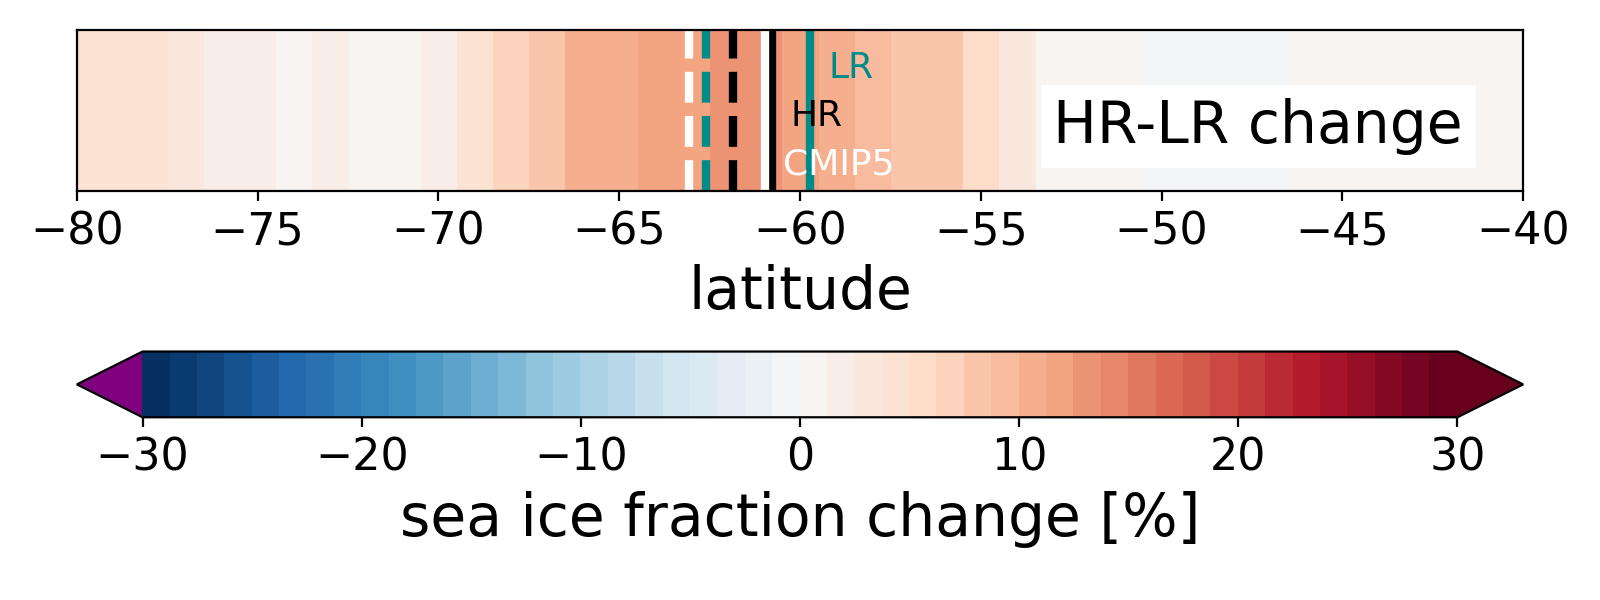

In [27]:
fig1, ax1 = plt.subplots(figsize=(8,3))
texfontsize=21
numfontsize=16

lvIce = np.linspace(0.,1.0,48) #12
cmIce = cm.RdBu_r(lvIce)
newCmap = mcol.ListedColormap(cmIce)
newCmap.set_bad('white',1.)
newCmap.set_under('purple')

cmap=cm.RdBu_r

which='LR'
period='sta'

yySIE=dataSIE[which]['yy'];
xxSIE=dataSIE[which]['xx'];

#plt.gca().invert_xaxis()

lats=yySIE[:,0];
lats[lats>0.]=np.nan; # just keep Southern Ocean
lons=xxSIE[0,:];

X=lats; Z=(HRchangeSIE-HRchaCTRSIE)-(LRchangeSIE-LRchaCTRSIE)

Y=np.arange(0,5)
Yrep=np.matlib.repmat(Y, 180, 1).T

im=plt.pcolor(np.array([X,X,X,X,X]),Yrep, np.array([Z,Z,Z,Z,Z]), cmap=newCmap, vmin=-20., vmax=20.)

lw_thick=3
lw_back=5

# HR vertical lines
plt.vlines(np.mean(dataSIE['HR']['extents_sta'][:]), 0., 4., color='k', linewidths=lw_thick, linestyle='solid')
plt.vlines(np.mean(dataSIE['HR']['extents_end'][:]), 0., 4., color='k', linewidths=lw_thick, linestyle='dashed')
# LR vertical lines
plt.vlines(np.mean(dataSIE['LR']['extents_sta'][:]), 0., 4., color='darkcyan', linewidths=lw_thick, linestyle='solid')
plt.vlines(np.mean(dataSIE['LR']['extents_end'][:]), 0., 4., color='darkcyan', linewidths=lw_thick, linestyle='dashed')
plt.axis([-78., 0., 0., 4.]);
# CMIP5 vertical lines
plt.vlines(CMIP5_IceEdge_sta[mhtCMIP5].mean().mean(), 0., 4., color='w', linewidths=lw_thick, linestyle='solid')
plt.vlines(CMIP5_IceEdge_end[mhtCMIP5].mean().mean(), 0., 4., color='w', linewidths=lw_thick, linestyle='dashed')

plt.xlabel('latitude', fontsize=fontsize)

ax1.set_xlim([-80.,-40.])
ax1.set_ylim([0,1.])
plt.xticks([-80,-75,-70,-65,-60,-55,-50,-45,-40])
# tick sizes
plt.xticks(fontsize=numfontsize, rotation=0)
plt.yticks(fontsize=numfontsize, rotation=0)

# Now adding the colorbar
cb=plt.colorbar(im, orientation='horizontal',pad=.3, fraction=0.4, extend='both')
cb.set_label('sea ice fraction change [%]', fontsize=fontsize)
cb.ax.tick_params(labelsize=numfontsize) 
plt.clim(-30.,30.)

ax1.axes.yaxis.set_visible(False)

ax1.text(-53.,0.3,'HR-LR change', fontsize=fontsize, backgroundcolor = 'w', color = 'k')
ax1.text(np.mean(dataSIE['LR']['extents_sta'][:]) + .5,0.7,'LR', fontsize=fontsize-8, backgroundcolor = 'none', color = 'darkcyan')
ax1.text(np.mean(dataSIE['HR']['extents_sta'][:]) + .5,0.4,'HR', fontsize=fontsize-8, backgroundcolor = 'none', color = 'k')
ax1.text(CMIP5_IceEdge_sta[mhtCMIP5].mean().mean() + .5,0.1,'CMIP5', fontsize=fontsize-8, backgroundcolor = 'none', color = 'w')

plt.tight_layout()

saveFIG=True
if saveFIG==True:
   pp = PdfPages('./Figure5e.pdf')
   pp.savefig(fig1,bbox_inches = 'tight')
   pp.close()

### Figure 5, panel f)

<IPython.core.display.Javascript object>


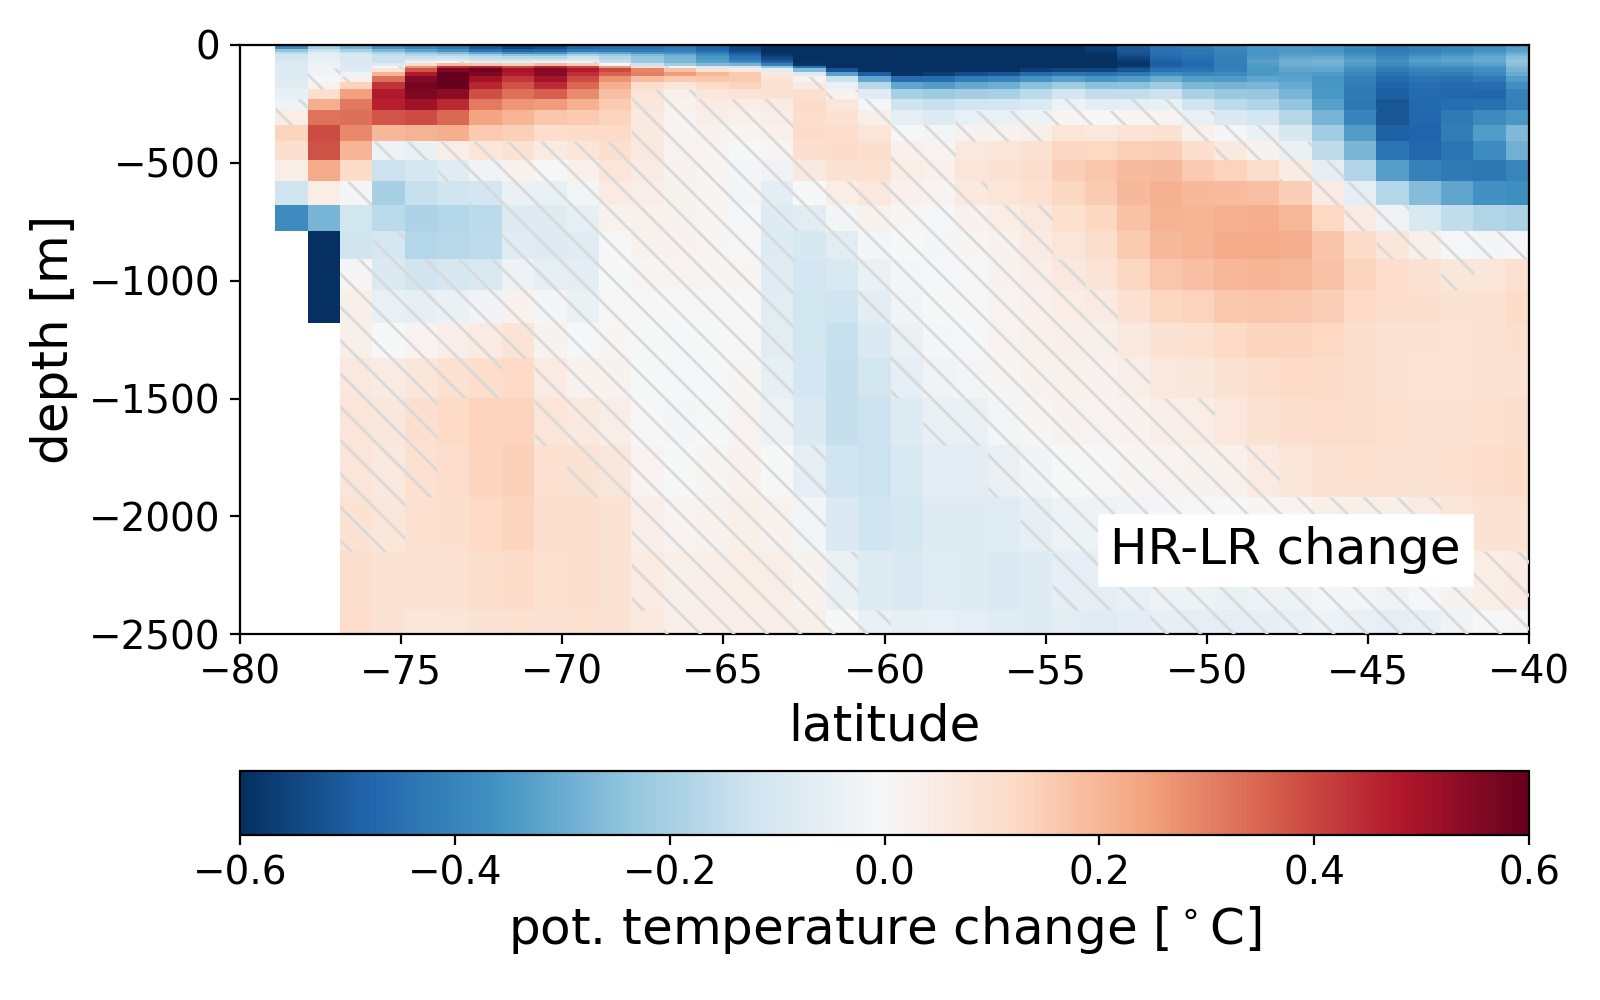

In [29]:
fig1, ax1 = plt.subplots(figsize=(8,5))
fontsize=18
numfontsize=14

# set nan to white
cmap=copy.copy(plt.cm.RdBu_r)
cmap.set_bad('white',1.)

# T colors
diffT=HRchange-LRchange
im=ax1.pcolormesh(LATS,DEPTH,diffT,vmin=-0.6,vmax=.6,cmap=cmap, shading='auto')

# T hatching
significance_hatching=np.abs(diffT)>2*(data['zonalmean30yr_STD']+data['zonalmean30yr_HRSTD'])/2.
zm = np.ma.masked_less(~significance_hatching, 1.)
none_map = ListedColormap(['none']) # get rid of the weird face color bug
im0=ax1.pcolor(LATS,DEPTH,zm, cmap=none_map, 
               hatch='\\\\', edgecolor='0.85', lw=0, zorder=6)

plt.xlabel('latitude', fontsize=fontsize)
plt.ylabel('depth [m]', fontsize=fontsize)

ax1.set_xlim([-80,-40])
ax1.set_ylim([-2500,0])
plt.xticks([-80,-75,-70,-65,-60,-55,-50,-45,-40])
# tick sizes
plt.xticks(fontsize=numfontsize, rotation=0)
plt.yticks(fontsize=numfontsize, rotation=0)
cb=plt.colorbar(im, orientation='horizontal',pad=.16)
cb.set_label('pot. temperature change [$^\circ$C]', fontsize=fontsize)
cb.ax.tick_params(labelsize=numfontsize) 

ax1.text(-53.,-2200.,'HR-LR change', fontsize=fontsize, backgroundcolor = 'w', color = 'k', zorder=7)

plt.tight_layout()

saveFIG=True
if saveFIG==True:
   pp = PdfPages('./Figure5f.pdf')
   pp.savefig(fig1,bbox_inches = 'tight')
   pp.close()